In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
pacbio_outpath = "/SGRNJ03/randd/user/fuxin/PROJECTS/pacbio_pipe/P21040501/L211029001-L"
sample = "dedup.5merge"

In [9]:
sample_file = paste0(pacbio_outpath,"/10.isoform/",sample,".collapsed_classification.filtered_lite_classification.txt")
#outdir = <outpath_for_pictures&tables>

In [8]:
clustcols = c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE","#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080","#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49","#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD","#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B","#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B","#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9","#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000","#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC","#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")

In [ ]:
sample_df = readr::read_tsv(sample_file)

In [34]:
sample_df%>%mutate(structural_category_short = ifelse(structural_category=="full-splice_match","FSM",
                                                      ifelse(structural_category=="incomplete-splice_match","ISM",
                                                            ifelse(structural_category=="novel_in_catalog","NIC",
                                                                  ifelse(structural_category=="novel_not_in_catalog","NNC",
                                                                        ifelse(structural_category=="genic","Genic",
                                                                              ifelse(structural_category=="intergenic","Intergenic",
                                                                                    ifelse(structural_category=="fusion","Fusion",
                                                                                          ifelse(structural_category=="antisense","Antisense","No_structure")))))))))->sample_df

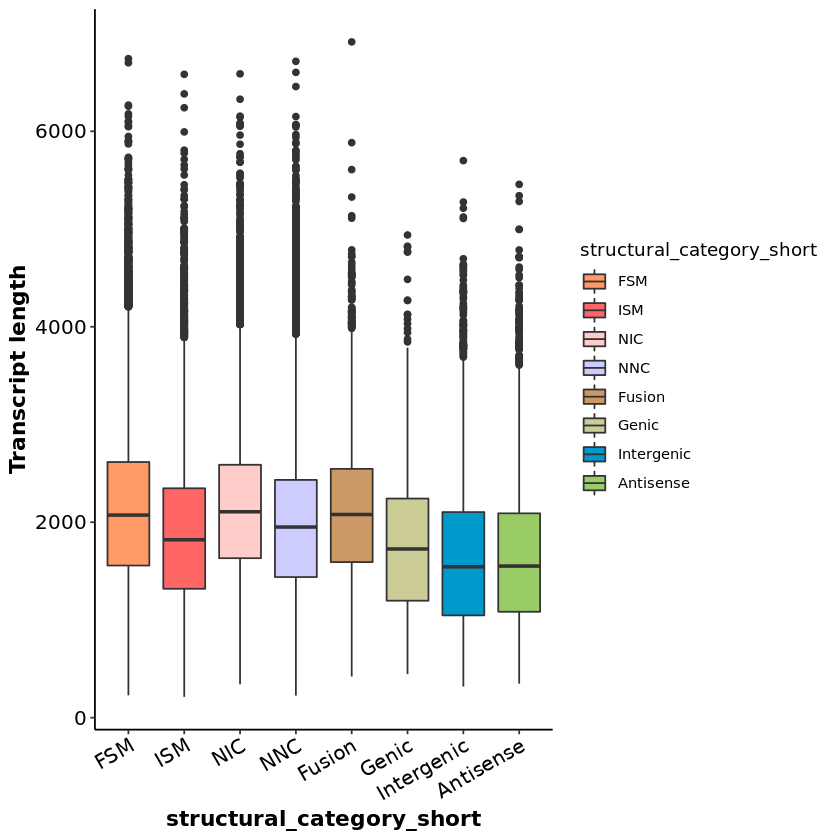

In [35]:
#转录本长度
color_length = c("#FF9966","#FF6666","#FFCCCC","#CCCCFF","#CC9966","#CCCC99","#0099CC","#99CC66")
sample_df$structural_category_short = factor(sample_df$structural_category_short,levels = c("FSM","ISM","NIC","NNC","Fusion","Genic","Intergenic","Antisense"))
ggplot(sample_df,aes(x = structural_category_short,y = length,fill = structural_category_short))+
geom_boxplot()+
scale_fill_manual(values = color_length)+
theme_classic()+
ylab("Transcript length")+
theme(
        axis.text.x=element_text(color = "black", size=12,angle = 30,hjust = 1,vjust=1),
        axis.text.y=element_text(color = "black", size=12),
        axis.title.x=element_text(color = "black", size = 13,face = "bold"),
        axis.title.y=element_text(color = "black", size = 13,face = "bold")
    )->p
#p_file = paste0(outdir,"/bxp.length_sample2.pdf")
#ggsave(p_file,p,width = 7.5,height = 6)
p

Warning message:
“Removed 333 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 291 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


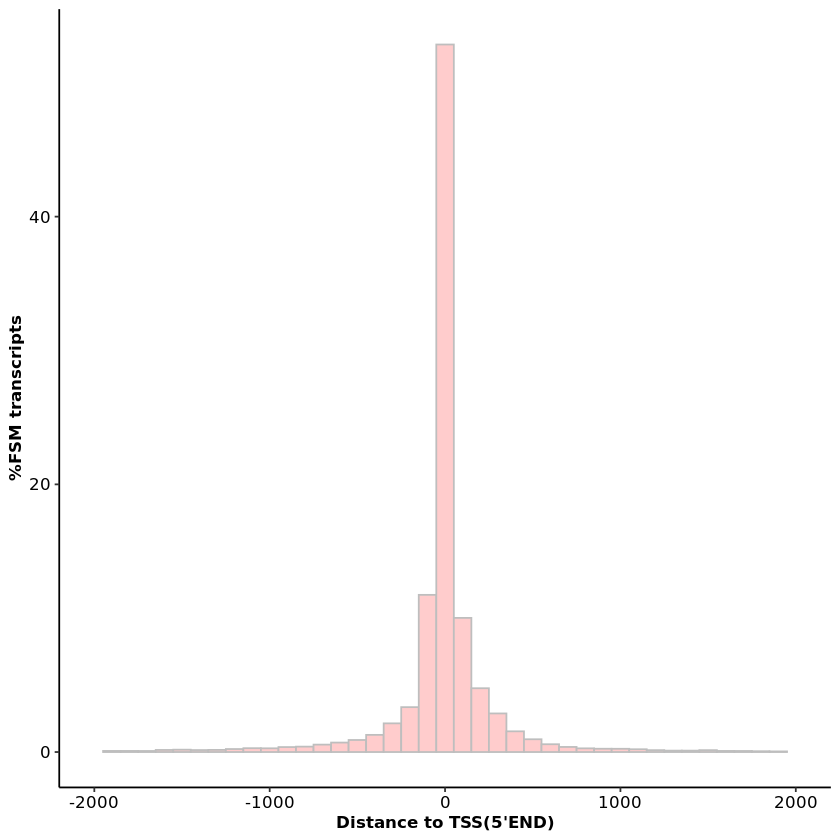

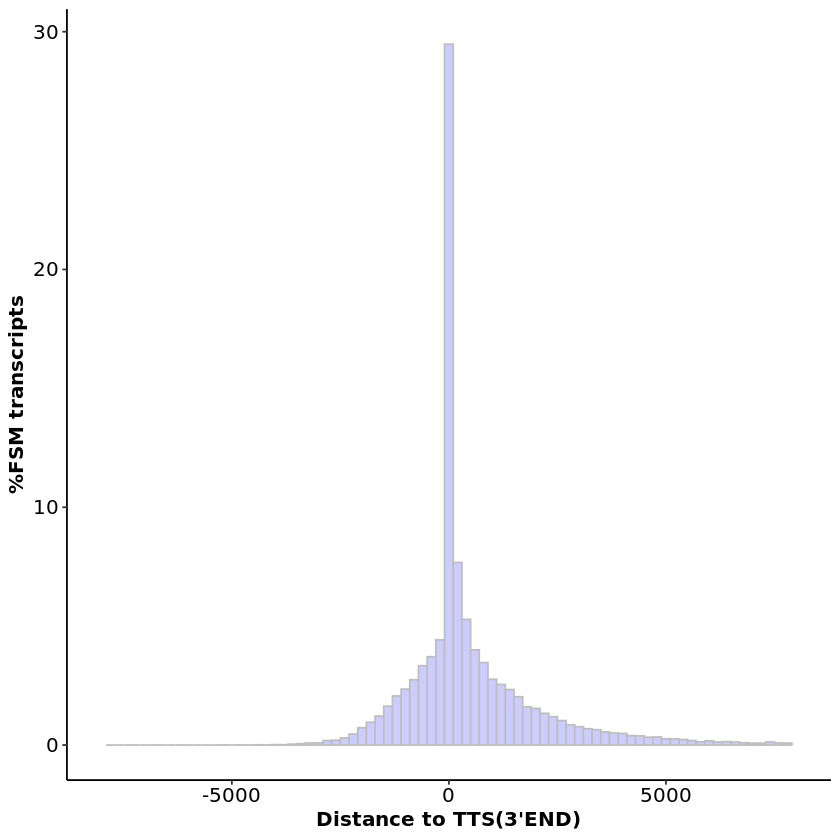

In [13]:
#转录本与TTS，TSS的距离
sample_df%>%filter(structural_category_short == "FSM")->gdf
ggplot(gdf,aes(x = diff_to_TSS,y=(..count../nrow(gdf))*100))+
geom_histogram(binwidth=100,fill="#FFCCCC",color="#BEBEBE")+
scale_x_continuous(limits = c(-2000,2000))+
theme_classic()+
ylab("%FSM transcripts")+
xlab("Distance to TSS(5'END)")+
theme(
        axis.text.x=element_text(color = "black", size=10),
        axis.text.y=element_text(color = "black", size=10),
        axis.title.x=element_text(color = "black", size = 10,face = "bold"),
        axis.title.y=element_text(color = "black", size = 10,face = "bold")
    )->p1
#p_file = paste0(outdir,"/dis2TSS_sample2.pdf")
#ggsave(p_file,p,width =4, height =4)
p1

sample_df%>%filter(structural_category_short == "FSM")->gdf
ggplot(gdf,aes(x = diff_to_TTS,y=(..count../nrow(gdf))*100))+
geom_histogram(binwidth=200,fill="#CCCCFF",color="#BEBEBE")+
scale_x_continuous(limits = c(-8000,8000))+
theme_classic()+
ylab("%FSM transcripts")+
xlab("Distance to TTS(3'END)")+
theme(
        axis.text.x=element_text(color = "black", size=12),
        axis.text.y=element_text(color = "black", size=12),
        axis.title.x=element_text(color = "black", size = 12,face = "bold"),
        axis.title.y=element_text(color = "black", size = 12,face = "bold")
    )->p2
#p_file = paste0(outdir,"/dis2TTS_sample2.pdf")
#ggsave(p_file,p,width =5, height =5)
p2

In [36]:
#统计新基因/新转录本
sample_df%>%mutate(transcript_class = ifelse(associated_transcript == "novel","Novel","Known"),
                   gene_class = ifelse(grepl("novelGene",associated_gene),"Novel","Known"))->sample_df

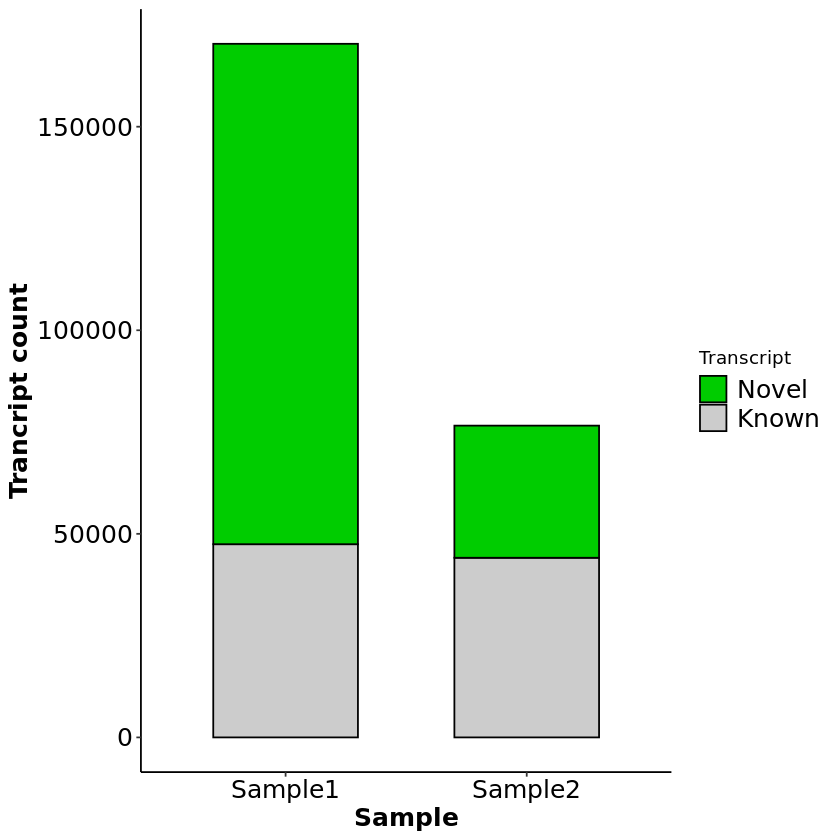

In [47]:
#如果有多组样本：新转录本柱状图
data.frame(table(sample_df$transcript_class))->df1
df1%>%mutate(sample = "Sample")->df1
data.frame(table(sample2_df$transcript_class))->df2
df2%>%mutate(sample = "Sample2")->df2
rbind(df1,df2)->df_t
colnames(df_t)<-c("Transcript","Count","Sample")
df_t$Transcript <- factor(df_t$Transcript,levels=c("Novel","Known"))

ggplot(df_t,aes(x = Sample,y = Count,fill = Transcript))+
geom_bar(stat = "identity",color = "black",width = 0.6)+
scale_fill_manual(values = c("#00CC00","#CCCCCC"))+
theme_classic()+
ylab("Trancript count")+
theme(
        axis.text.x=element_text(color = "black", size=15),
        axis.text.y=element_text(color = "black", size=15),
        axis.title.x=element_text(color = "black", size = 15,face = "bold"),
        axis.title.y=element_text(color = "black", size = 15,face = "bold"),
        legend.text = element_text(color = "black", size=15)
    )->p3
#p_file = paste0(outdir,"/bar.transcript_novel.pdf")
#ggsave(p_file,p,width = 6)
p3

In [36]:
#如果有多组样本：新基因柱状图
sample1_df%>%select(associated_gene,gene_class)%>%unique()->sample1_df_1
sample2_df%>%select(associated_gene,gene_class)%>%unique()->sample2_df_1

In [37]:
data.frame(table(sample1_df_1$gene_class))%>%mutate(Sample = "Sample1")->df1
data.frame(table(sample2_df_1$gene_class))%>%mutate(Sample = "Sample2")->df2
rbind(df1,df2)->df_g
colnames(df_g)<-c("Gene","Count","Sample")
df_g$Gene <- factor(df_g$Gene,levels=c("Novel","Known"))

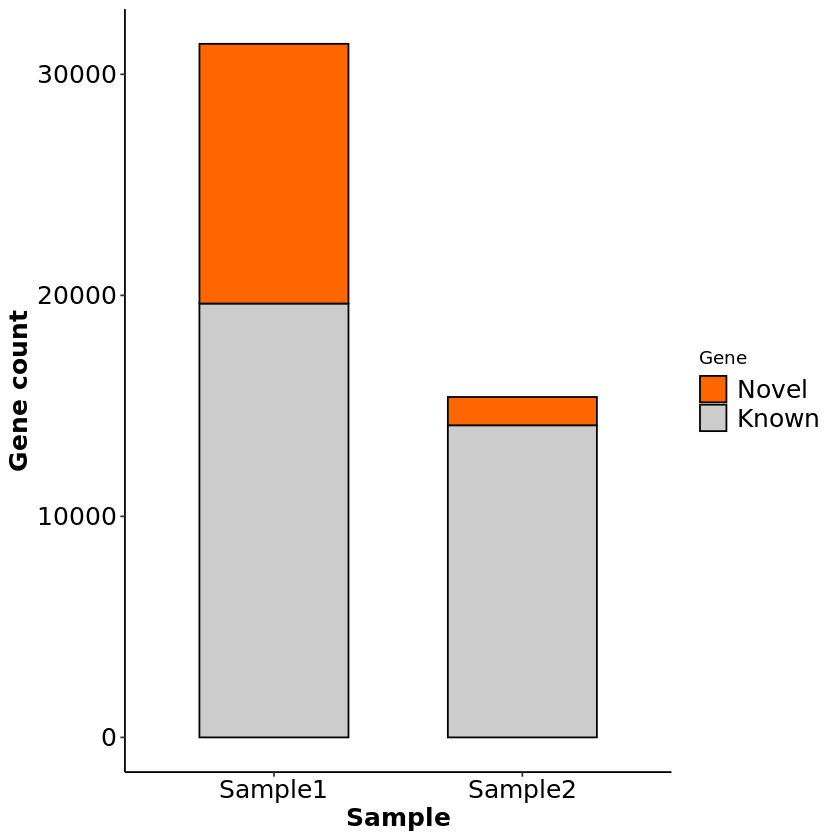

In [48]:

ggplot(df_g,aes(x = Sample,y = Count,fill = Gene))+
geom_bar(stat = "identity",color = "black",width = 0.6)+
scale_fill_manual(values = c("#FF6600","#CCCCCC"))+
theme_classic()+
ylab("Gene count")+
theme(
        axis.text.x=element_text(color = "black", size=15),
        axis.text.y=element_text(color = "black", size=15),
        axis.title.x=element_text(color = "black", size = 15,face = "bold"),
        axis.title.y=element_text(color = "black", size = 15,face = "bold"),
        legend.text = element_text(color = "black", size=15)
    )->p4
#p_file = paste0(outdir,"/bar.gene_novel.pdf")
#ggsave(p_file,p,width = 6)
p4

In [19]:
#整合二代测序的细胞类型注释
isoform_annotation_file = "data/11.annotation/dedup.annotated.csv"
hgnc_symbol_file = "data/hgnc_complete_set.txt"
ngs_celltype_anno_file = "data/celltype_anno.csv"

celltype_anno_df = readr::read_csv(ngs_celltype_anno_file)
isoform_anno_df = readr::read_tsv(isoform_annotation_file)
gene_df = readr::read_tsv(hgnc_symbol_file)


── Column specification ────────────────────────────────────────────────────────
cols(
  sample = col_character(),
  barcode = col_character(),
  celltype = col_character()
)




In [21]:
celltype_anno_df%>%
    separate(barcode,into = c("barcode","no."))->celltype_anno_df
head(celltype_anno_df)

sample,barcode,no.,celltype
<chr>,<chr>,<chr>,<chr>
OA6,AAACATCGAACGTGATCTGAGCCA,1,SSCs
OA6,AAACATCGGGAGAACACCAGTTCA,1,SSCs
OA6,AACAACCAAATGTTGCACGCTCGA,1,SSCs
OA6,AACAACCAAGAGTCAAATCCTGTA,1,SSCs
OA6,AACCGAGAAGCACCTCCTCAATGA,1,SSCs
OA6,AACCGAGAGACAGTGCCCGACAAC,1,SSCs


In [24]:
isoform_anno_df%>%
    select(pbid,BC)%>%
    right_join(celltype_anno_df,by = c("BC" = "barcode"))->iso_cellanno

In [37]:
sample_df%>%
    left_join(iso_cellanno,by = c("isoform" = "pbid"))%>%
    filter(!is.na(celltype))->sample_df

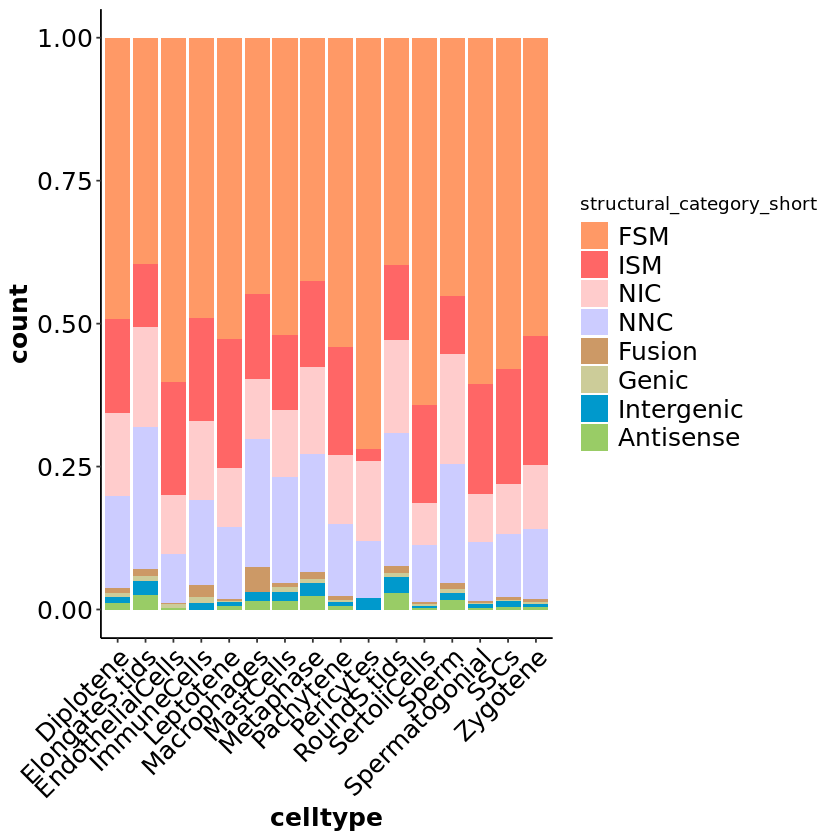

In [38]:
color_cate = c("#FF9966","#FF6666","#FFCCCC","#CCCCFF","#CC9966","#CCCC99","#0099CC","#99CC66")
ggplot(sample_df,aes(x = celltype,fill = structural_category_short ))+
geom_bar(position = "fill")+
scale_fill_manual(values = color_cate)+
theme_classic()+
theme(
        axis.text.x=element_text(color = "black", size=15,angle = 45,hjust = 1,vjust =1),
        axis.text.y=element_text(color = "black", size=15),
        axis.title.x=element_text(color = "black", size = 15,face = "bold"),
        axis.title.y=element_text(color = "black", size = 15,face = "bold"),
        legend.text = element_text(color = "black", size=15)
    )->p
p

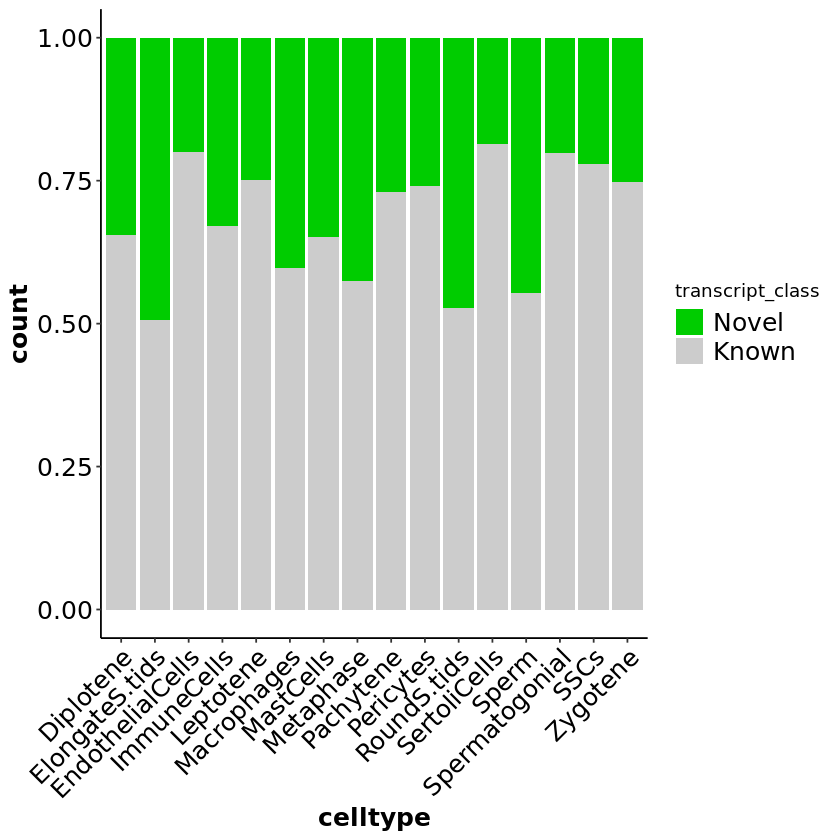

In [40]:
sample_df$transcript_class <- factor(sample_df$transcript_class,levels=c("Novel","Known"))
ggplot(sample_df,aes(x = celltype,fill = transcript_class ))+
geom_bar(position = "fill")+
scale_fill_manual(values =  c("#00CC00","#CCCCCC"))+
theme_classic()+
theme(
        axis.text.x=element_text(color = "black", size=15,angle = 45,hjust = 1,vjust =1),
        axis.text.y=element_text(color = "black", size=15),
        axis.title.x=element_text(color = "black", size = 15,face = "bold"),
        axis.title.y=element_text(color = "black", size = 15,face = "bold"),
        legend.text = element_text(color = "black", size=15)
    )->p
p

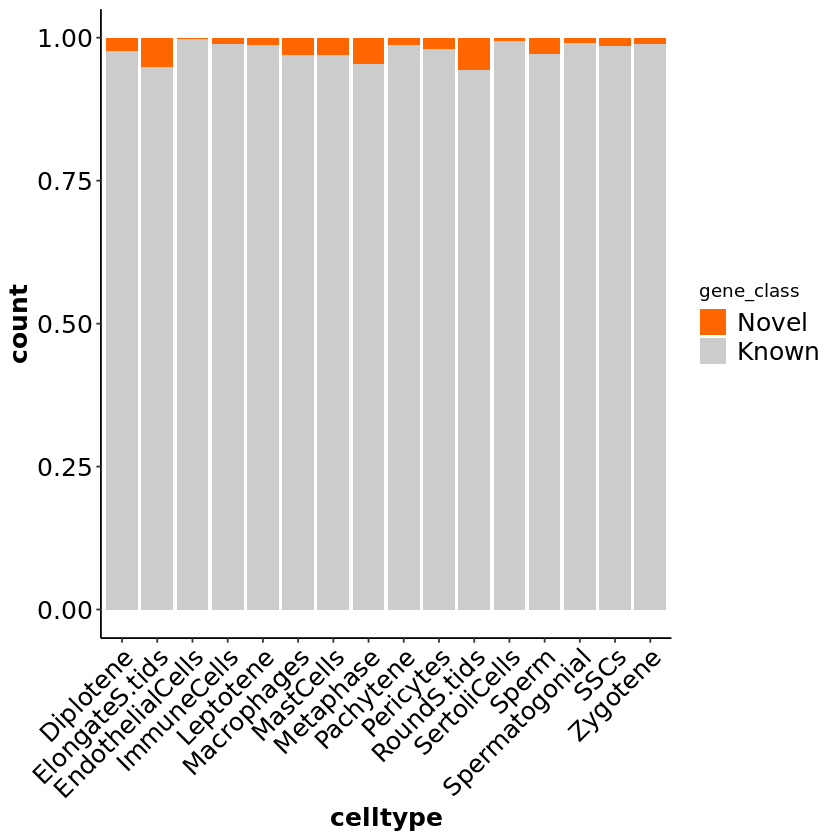

In [41]:
sample_df$gene_class <- factor(sample_df$gene_class,levels=c("Novel","Known"))
ggplot(sample_df,aes(x = celltype,fill = gene_class ))+
geom_bar(position = "fill")+
scale_fill_manual(values =  c("#FF6600","#CCCCCC"))+
theme_classic()+
theme(
        axis.text.x=element_text(color = "black", size=15,angle = 45,hjust = 1,vjust =1),
        axis.text.y=element_text(color = "black", size=15),
        axis.title.x=element_text(color = "black", size = 15,face = "bold"),
        axis.title.y=element_text(color = "black", size = 15,face = "bold"),
        legend.text = element_text(color = "black", size=15)
    )->p
p